# <span style="color:green"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color:blue"> Esercitazione Numerica 2 </span>

### Esercizio 02.1: Calcolo di un integrale monodimensionale con metodi Monte Carlo (MC)

L'**obiettivo** di questo primo esercizio consiste nel calcolo **MC**, ossia via tecniche di campionamento statistico, del seguente integrale monodimensionale:
$$
I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1
$$

La stima statistica del valore dell'integrale $I$ accompagnata dalla relativa incertezza viene determinata sfruttando due algoritmi MC differenti:
1. Campionando una variabile casuale uniformemente distribuita nell'intervallo $[0,1]$.
2. Con la tecnica dell'**importance sampling**, campionando una variabile casuale distribuita non uniformemente.

Per entrambi i calcoli MC si riporta un grafico che illustra l'andamento delle stime dell'integrale in funzione del numero totale di campionamenti o di steps MC $M=10^4$ divisi in un numero di blocchi $N=100$ con le relative incertezze statistiche, determinate con il "blocking method", rappresentate dalla barre d'errore.

In [16]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 12})

path = "Es 2.1/DATA/"


#### 1) Campionamento di una distribuzione uniforme in $[0,1]$

Si supponga di poter scrivere l'integranda (per semplicità la trattazione sarà limitata al caso unidimensionale) fattorizzandola come il prodotto di una funzione $g(x)$ generica e di una densità di probabilità $p(x)$ definita positiva e normalizzata:
$$I = \int_R g(x)p(x)dx $$  con $p(x)\geq 0 $  e  $\int_R p(x)dx = 1$.

Allora una stima dell'integrale data da un calcolo MC può essere ottenuta effettuando N campionamenti della variabile casuale x distribuita secondo la pdf $p(x)$ e determinando il valor medio della funzione $g(x)$ sull'insieme di tutte le variabili campionate:
$$
G_N = \frac{1}{N}\sum_{i=1}^{N} g(x_i)
$$
con $N$ numero delle variabili campionate o steps MC.

Tale variabile rappresenta l'estimatore dell'integrale MC in modo che $G_N = I\pm\epsilon$, dove l'errore $\epsilon$, nel caso in cui la varianza esista, è a sua volta una variabile casuale la cui ampiezza, in virtù del Teorema del Limite Centrale, per un numero grande di $N$ presenta il seguente andamento:
$$
\epsilon = \frac{\sigma_i}{\sqrt N}
$$
con varianza ${\sigma_i}^2 = \int_R g^2(x)p(x)dx - I^2$ ,  cioè il valore di aspettazione del quadrato dell'integranda meno il quadrato dell'integrale stesso, valor di aspettazione della variabile somma $G_N$. 

Ora per l'integrale dell'esercizio è sufficiente fare le seguenti identificazioni:

- L'integranda $g(x) =\frac{\pi}{2}\cos(\pi x/2)$
- La pdf $p(x)=1$ nell'intervallo $[0,1]$ e 0 altrimenti, ossia distribuzione uniforme nell'intervallo $[0,1]$
- $G_N = \frac{1}{N}\sum_{i=1}^{N} \frac{\pi}{2}\cos(\pi x_i/2)$, con $x_i$ variabile casuale ottenuta campionando la pdf appena definita.
**N.B**  N non è il numero di blocchi in questo caso, ma è un indice generico

Di seguito il grafico della stima dell'integrale $I$ ottenuta con questa tecnica, in funzione del numero di blocchi, con il rispettivo errore.

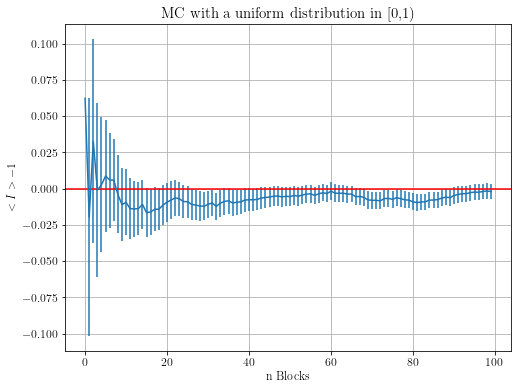

In [5]:
#reading number of blocks and throws per block from file
ndata = open( path + "ndata.txt" , "r" )
Nblocks = int(ndata.readline())
Nstesps = int(ndata.readline())

#loading cumulative average and SDM of Uniform Integral
y1 = np.loadtxt(path + "unif_integral.txt")
error1 = np.loadtxt(path + "dev_unif_integral.txt")

# Number of blocks
x = np.arange(Nblocks)

#Plotting values
fig = plt.figure(figsize=(8,6))
plt.errorbar(x, y1 - 1 , yerr=error1)
plt.title("MC with a uniform distribution in [0,1)", size='15')
plt.xlabel('n Blocks')
plt.ylabel('$<I> - 1$')
plt.axhline(y=0, color = 'r', linestyle = '-')
plt.grid(True)
plt.show()

#### 2) Importance Sampling

Prima di introdurre la tecnica del campionamento rilevante per il calcolo di integrali con metodi MC è utile ricordare il significato della seguente quantità:

$$
Q_i = t_i{\sigma_i}^2
$$  
dove con il primo termine si indica il tempo computazionale richiesto per il campionamento di una singola configurazione e il secondo termine è la varianza associata ad uno specifico calcolo MC, il cui valore dipenderà dalla scelta adottata per l'algoritmo stesso.

Per confrontare due metodi MC differenti, la misura di questa grandezza fornisce un'informazione sulla *qualità* e l'*efficienza* dell'algoritmo: tanto è minore $Q_i$ tanto il calcolo è statisticamente più efficiente e preciso, rispettivamente.

Ora la tecnica dell'**importance sampling** permette di migliorare l'efficienza del calcolo MC di un integrale, ossia ridurre la variabile $Q_i$, scegliendo una distribuzione di probabilità $d(x)$ in sostituzone alla precedente $p(x)$ in modo tale che minimizzi le fluttuazioni, cioè la varianza ${\sigma_i}^2$ del calcolo.

Si introduca la nuova pdf $d(x)$ nell'integrale $I = \int_R \frac{g(x)p(x)}{d(x)}d(x)dx $ tale che sia *definita positiva*, *normalizzata* e che la nuova integranda sia non singolare. Senza ripercorrere il calcolo dettagliato, ricordandosi di tenere conto del vincolo della normalizzazione per la nuova scelta, si ottiene che la migliore funzione di distribuzione che minimizza la varianza della stima MC dell'integrale $I$ è quella che più assomiglia alla vecchia integranda $g(x)p(x)$.

Un'altra tecnica utilizzata al fine di ridurre la varianza ${\sigma_i}^2$ è quella dell'**antithetic variates**. Questo metodo sfrutta la riduzione dell'errore causata da variabili casuali *negativamente correlate*. Se questo avviene nel nostro caso, data una stima di $I$ che è più grande del valore medio, la stima successiva sarà molto probabilmente inferiore rispetto alla media, rendendo la media di questi due valori notevolmente vicina alla media globale e riducendo l'errore di conseguenza.

Per questo motivo nel nostro caso la funzione integranda $g(x) =\frac{\pi}{2}\cos(\pi x/2)$ è stata sostituita da $g(x) =\frac{\pi}{4}(\cos[\frac{\pi x}{2}] + \cos[\frac{\pi(1-x)}{2}])$ ,in modo tale che $g(x_i)$ e $g(1-x_i)$  siano negativamente correlate. La strategia degli *A.V.* si sposa molto bene con l'*I.S.*

**N.B.** Vale ancora $I = \int_0^1 \frac{\pi}{4}(\cos[\frac{\pi x}{2}] + \cos[\frac{\pi(1-x)}{2}]) dx = 1$

Per l'esercizio in questione si è ritenuto ragionevole scegliere di campionare variabili casuali distribuite secondo la funzione di distribuzione di probabilità seguente

$$
d(x) = \frac{(1-\frac{\pi^2}{8}(x-\frac{1}{2})^2)}{(1-\frac{\pi^2}{96})}
$$ 

con  coefficiente di normalizzazione ottenuto dalla condizione $\int_R d(x)dx$. La $d(x)$ è ottenuta tramite un espansione di Taylor della $g(x)$ in $x=\frac{1}{2}$ di ordine $O(2)$, che ben approssima la funzione da integrare come richiesto dall'*I.S.*.

La nuova integranda per *I.S.* sarà quindi: 
$$
\frac{g(x)p(x)}{d(x)} = \frac{\frac{\pi}{4}(\cos[\frac{\pi x}{2}] + \cos[\frac{\pi(1-x)}{2}])}{\frac{(1-\frac{\pi^2}{8}(x-\frac{1}{2})^2)}{(1-\frac{\pi^2}{96})}}
$$

Il nuovo integrale 
$$ 
I = \int_0^1\frac{\frac{\pi}{4}(\cos[\frac{\pi x}{2}] + \cos[\frac{\pi(1-x)}{2}])}{\frac{(1-\frac{\pi^2}{8}(x-\frac{1}{2})^2)}{(1-\frac{\pi^2}{96})}}\frac{(1-\frac{\pi^2}{8}(x-\frac{1}{2})^2)}{(1-\frac{\pi^2}{96})}dx
$$

Per eseguire il nuovo calcolo MC rimane solo da determinare come campionare variabili casuali che seguono la nuova pdf $d(x)$. Si realizza ciò con la tecnica **Accept/Reject**, utile per distribuzioni di probilità limitate ad intervalli reali finiti $[x_min,x_max]$ ($[0,1]$ nel nostro caso), dove un punto estratto uniformemente in questo intervallo viene accettato con probabiltà $\frac{p(x)}{p_{max}}$, essendo $p(x)$ la pdf da campionare e $p_{max}$ il suo massimo ($p_{max} = d(1/2)$ per l'esperimento). Questo metodo viene implementato nella classe *Random*.

Di seguito è mostrata la distribuzione di 100000 punti estratti secondo la $d(x)$ con il metodo dell'A/R. Si osserva subito che l'andamento rispetto alla funzione analitica è fortemente rispettato.


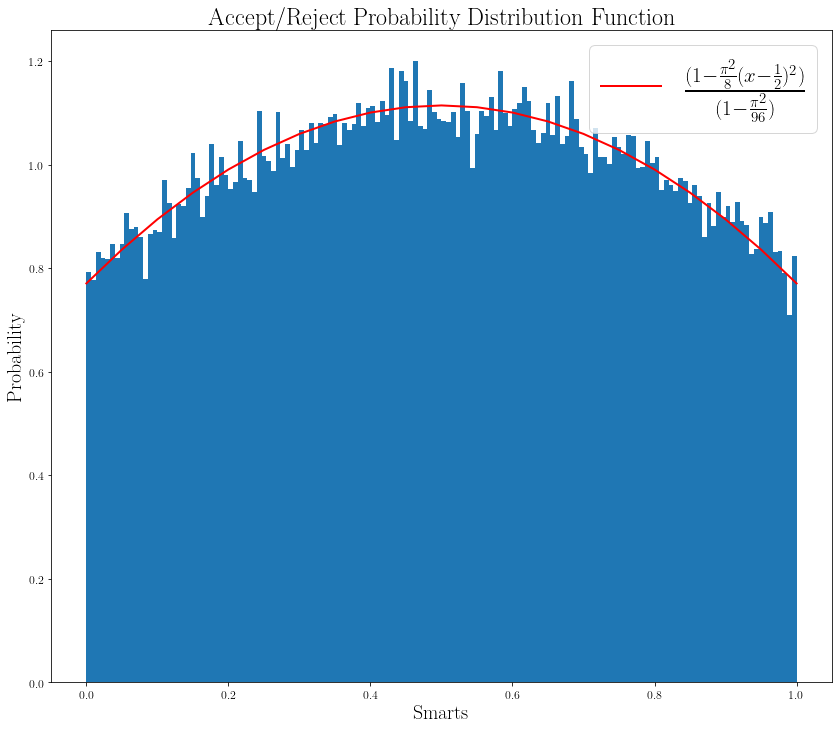

In [6]:
x = np.loadtxt(path + "AR_pdf.txt")
plt.figure(figsize=(14,12))

n_bins = 150
n, bins, patches = plt.hist(x, n_bins, density=True, range=(0,1))


plt.xlabel('Smarts' , fontsize=20)
plt.ylabel('Probability',  fontsize=20)
plt.title('Accept/Reject Probability Distribution Function' ,  fontsize=24)

pi = np.pi

x = np.arange(0, 1.05 , .05)
plt.plot(x, (1-pi*pi/8*(x-1/2)**2)/(1-pi*pi/96) , color='r', lw=2 , label=r'$\frac{(1-\frac{\pi^2}{8}(x-\frac{1}{2})^2)}{(1-\frac{\pi^2}{96})}$' )

plt.legend( fontsize =30)


plt.show()

Di seguito il grafico della stima dell'integrale $I$ ottenuta con la tecnica appena descritta, in funzione del numero di blocchi, con il rispettivo errore.

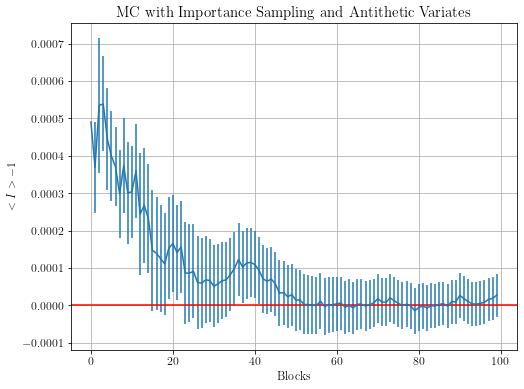

In [18]:
#loading cumulative average and SDM of Uniform Integral
y2 = np.loadtxt(path + "IS_integral.txt")
error2 = np.loadtxt(path + "dev_IS_integral.txt")

# Number of blocks
x = np.arange(Nblocks)

#Plotting values
fig = plt.figure(figsize=(8,6))
plt.errorbar(x, y2 - 1 , yerr=error2)
plt.xlabel('Blocks')
plt.ylabel('$<I> - 1$')
plt.axhline(y=0, color = 'r', linestyle = '-')
plt.title("MC with Importance Sampling and Antithetic Variates", size='15')
plt.grid(True)
plt.show()

Un'attenta analisi degli andamenti mostrati porta alle seguenti **conclusioni**:

1. Entrambe le stime *convergono*, all'aumentare del numero dei blocchi, al valore teorico dell'integrale pari a $1$ entro una sigma dalla media.

2. Durante la convergenza le barre di errore si *restringono* con un andamento in funzione di $N$ pari a $\sqrt N$ come atteso.

3. La considerazione più **importante**: l'*incertezza statistica* per la stima di $I$ sfruttando la tecnica dell'Importance Sampling si osserva ridursi nella stima finale di un fattore 100 circa rispetto al primo caso confermando che il secondo calcolo MC è più **efficiente** realizzando una $Q_i$ minore. La nuova scelta della funzione di distribuzione di probabilità da campionare, molto più simile all'integranda rispetto alla distribuzione uniforme, ha permesso di abbassare la varianza ${\sigma_i}^2$ del secondo calcolo Monte Carlo e di conseguenza di ridurre l'incertezza statistica $\epsilon$ a parità di steps MC impiegati.  L'implementazione della tecnica dell'Antithetic Variates, inoltre, ha aiutato notevolmente nella riduzione dell'incertezza (stime senza questa tecnica, qui non riportate, presentavano un miglioramento solamente di un fattore 10).

Di seguito è riportato il grafico del rapporto delle incertezze statistiche dei due metodi $\frac{\sigma_{unif}}{\sigma_{imp}}$ al variare del numero di blocchi, a mostrare proprio quanto appena affermato.

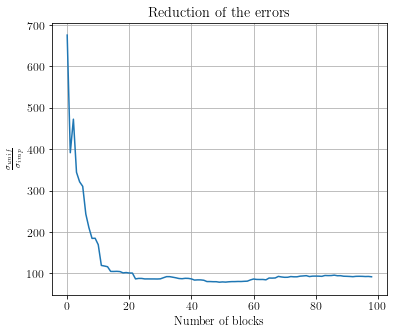

In [137]:
appo=error1[1:]/error2[1:]
x = np.arange(Nblocks -1)

fig = plt.figure(figsize=(6,5))
plt.plot(x, appo)
plt.xlabel('Number of blocks')
plt.ylabel(r'$\frac{\sigma_{unif}}{\sigma_{imp}}$')
plt.title("Reduction of the errors")
plt.grid(True)
plt.show()



### Esercizio 02.2: Random Walk (RW) 3D

Un **Random Walk** è la formalizzazione matematica di una *traiettoria* che consiste nel prendere *steps* casuali successivi. In un caso molto semplice, come quello di un reticolo regolare, il cammino può essere fatto solo attraverso salti ad ogni istante temporale $\tau$, eventualmente discreto, tra i siti confinanti del reticolo in accordo con una data pdf.

Risulta possibile modellizzare un RW come un *processo stocastico* di **Markov** (il cosiddetto "gas-ideale" dei processi stocastici), un processo senza memoria per il quale è relativamente semplice calcolare la *distribuzione di probabilità congiunta*, funzione della famiglia di variabili casuali dipendenti dal tempo, che permette di allargare le frontiere delle tecniche di campionamento statistico a fenomeni *dipendenti dal tempo*.

L'**obiettivo** di questo secondo esercizio consiste nel simulare $M=10^4$ **RW** tridimensionali (3D) divisi in $N=100$ blocchi con un numero di passi $P=100$ ripartendo ogni volta dall'origine del sistema di riferimento adottato:

1. Per un **reticolo cubico** con *spaziatura* costante $a=1$ in modo che ad ogni tempo discreto $\tau$ il camminatore possa compiere un passo di lunghezza discreta $a$ avanti o indietro, con uguale probabilità, in una delle tre direzioni principali del reticolo: $x$,$y$ e $z$.

2. Sul continuo in modo che il camminatore possa compiere un passo di lunghezza costante $a=1$ in una **direzione casuale** dello spazio, ottenuta campionando uniformemente l'angolo solido, ad ogni tempo discreto $\tau$.


#### 1) RW per il reticolo cubico 

Per simulare il cammino, ad ogni passo, vengono implementati dei metodi ulteriori nel generatore di numeri pseudo-casuali che consentono di far **avanzare**($+a$), o **retrocedere**($-a$), la posizione del camminatore sul reticolo selezionando un asse casuale del sistema di riferimento cartesiano $O_{xyz}$. 
Per fare ciò viene implementato in *Random* una funzione per campionare **eventi discreti** $E_k$ con probabilità $p_k$ qualsiasi (ma tali che $\sum_k p_k = 1$), sfruttando numeri distribuiti uniformemente in $[0,1)$ e la **binary search**. In questo caso, ovviamente, l'utilizzo di questo metodo non è strettamente necessaria, dato che tutti gli eventi di spostamento considerati hanno probabilità $\frac{1}{6}$ di avvenire e l'utilizzo di tecniche più semplici è sicuramente più indicato. L'implementazione viene fatta in vista di possibili utilizzi futuri. 

Di seguito la distribuzione di probabilità di 10000 eventi di spostamento estratti con la tecnica degli eventi discreti. Come ci si aspetta la distribuzione è uniforme.

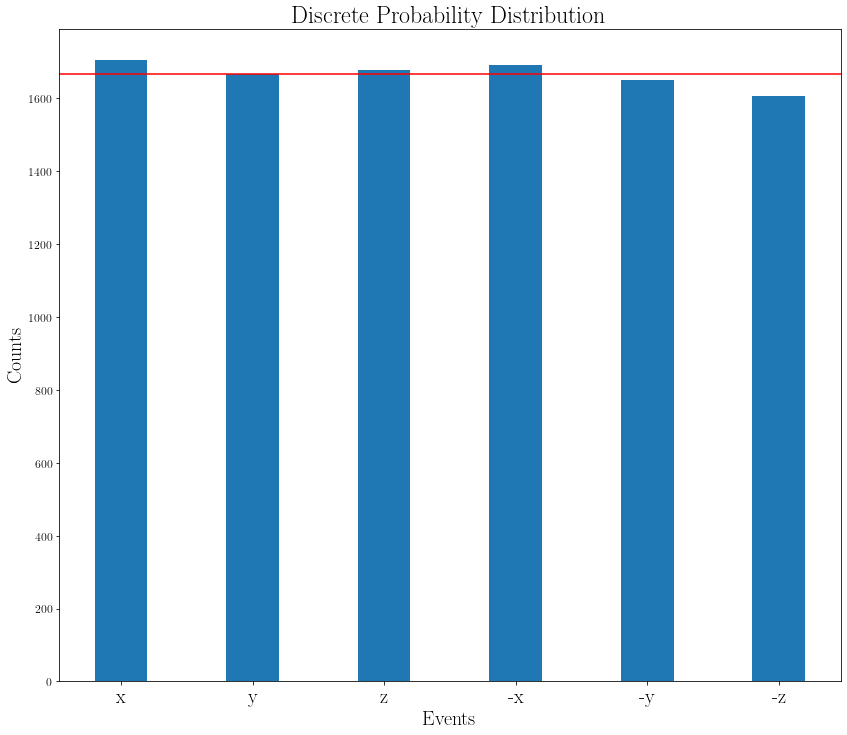

In [19]:
path = "Es 2.2/DATA/" 

x = np.loadtxt(path + "discrete.txt")
plt.figure(figsize=(14,12))

n = ['x' , 'y' , 'z' , '-x' , '-y' , '-z']
counts = np.zeros(6)

for i in range(len(x)):
    counts[(int)(x[i])] += 1
    


plt.bar(n, counts, 
        width = 0.4)

plt.xlabel('Events' , fontsize=20)
plt.ylabel('Counts',  fontsize=20)
plt.xticks(fontsize = 20)
plt.axhline(y=1667, color = 'r', linestyle = '-')
plt.title('Discrete Probability Distribution' ,  fontsize=24)

plt.show()


#### 2) RW sul continuo

Rispetto al caso precedente, per simulare questo cammino bisogna campionare uniformemente l'angolo solido, cioè generare un vettore unitario (perchè $a=1$) che punti in una direzione casuale dello spazio 3D. Passando a coordinate sferiche ($\theta$,$\phi$) il calcolo si rivela piuttosto semplice, infatti, si intende generare valori casuali di $\theta$ e $\phi$ in modo tale che un numero uguale di vettori che essi individuano cada in altrettante divisioni uguali dell'angolo solido. Dunque, sapendo che l'angolo solido in queste coordinate è $\sin(\theta)d\theta d\phi$ per raggungere lo scopo è necessario generare valori di $\phi$ uniformemente distribuiti nell'intervallo $[0,2\pi]$ e valori di $\theta$ nell'intervallo $[0,\pi]$ in accordo con la funzione di distribuzione di probabilità, opportunamente normalizzata, $P_{\theta}(\theta) = \frac{1}{2}\sin(\theta)$. Usando il metodo dell'inversione della cumulativa si ottiene:

- $F_{\theta}(\theta) = \frac{1}{2}(1-\cos \theta):=y(\theta)$    con $y$ distribuita uniformemente su $[0,1]$.

- la variabile $\theta = \cos^{-1}(1-2y)$

Ora, analogamente al RW sul reticolo, dopo aver campionato la direzione casuale, il camminatore procede ad ogni passo lungo le direzioni $x$,$y$,$z$ in accordo alle seguenti formule:
1. $x = \sin\theta\cos\phi$
2. $y = \sin\theta\sin\phi$
3. $z = \cos\theta$

Nel limite continuo ($ a\to 0 , \tau \to 0 $ ) la funzione densità di probabilità congiunta che caratterizza la catena di markov che modellizza il RW soddisfa la cosiddetta **equazione di diffusione** (per semplicità nel caso 1D):
$$
\frac{\partial p_1(x,t)}{\partial t} = D \frac{{\partial}^2 p_1(x,t)}{\partial x^2}
$$
con $ D = \lim_{a\to 0 , \tau \to 0} \frac{a^2}{2\tau} $ coefficiente  di diffusione. Ciò significa che nel limite continuo il RW è descritto da un'equazione differenziale del tipo sopra indicato.

L'equazione risolta, con le opportune condizioni al contorno, porta alla seguente soluzione:
$$
p_1(x,t) = \frac{1}{\sqrt{4\pi Dt}} e^{-\frac{x^2}{4Dt}}
$$
ossia una una distribuzione di probabilità gaussiana con valore medio $ \langle x(t) \rangle = 0 $ e varianza  $ \langle x^2(t) \rangle = 2Dt $.

Lo stesso risultato si ottiene applicando il **Teorema del Limite Centrale** alla somma di N variabili casuali indipendenti distribuite secondo:
$$
p(x) = \frac{1}{2} [\delta(x+a) + \delta(x+a) ]
$$
che altro non è che la realizzazione di un RW unidimensionale sul reticolo con numero di passi N.

Allora è possibile, nel caso tridimensionale dell'esercizio, affermare che i risultati mostrano un **comportamento diffusivo** se la radice del modulo quadro della distanza all'-iesimo passo del RW, opportunamente mediata sui blocchi della simualzione soddisfa la seguente espressione: 
$$
\sqrt{\langle |\vec{r}_i|^2 \rangle_{RW}} = \sqrt{2Dt} = \sqrt{2\frac{a^2}{2\tau}t}  \stackrel{a=1, t=i\tau} {=}   \sqrt{i} 
$$ 
dove $i$ è un numero intero che indica l'-iesimo passo compiuto dal camminatore e perchè l'equazione sia valida $i$ deve essere sufficientemente grande (*Teorema del Limite Centrale*).



Nei grafici sottostanti vengono riportati gli andamenti della radice del valore medio sui rispettivi RWs del modulo quadro della distanza del camminatore dall'origine in funzione del numero di passi $i = 1,2, ..., P=100 $ crescente $\sqrt{\langle |\vec{r}_i|^2 \rangle_{RW}}$ con la relativa incertezza statistica stimata con il *blocking method*. Inoltre per ciascuno dei due grafici, per verificare il comportamento diffusivo che caratterizza il processo stocastico, viene disegnato il fit dei risultati con una funzione $f(i)=k\sqrt{i}$ con k parametro da ottimizzare. Se il parametro che approssima meglio i dati dovesse risultare $k\simeq 1$ il risulato del fit sarebbe in accordo con le precedenti considerazioni.

optimized parameter k for the cubic lattice =
[0.99948801]+/-[7.63706324e-08]
optimized parameter k for the continuum =
[1.00024001]+/-[4.66843151e-08]


<Figure size 4320x2160 with 0 Axes>

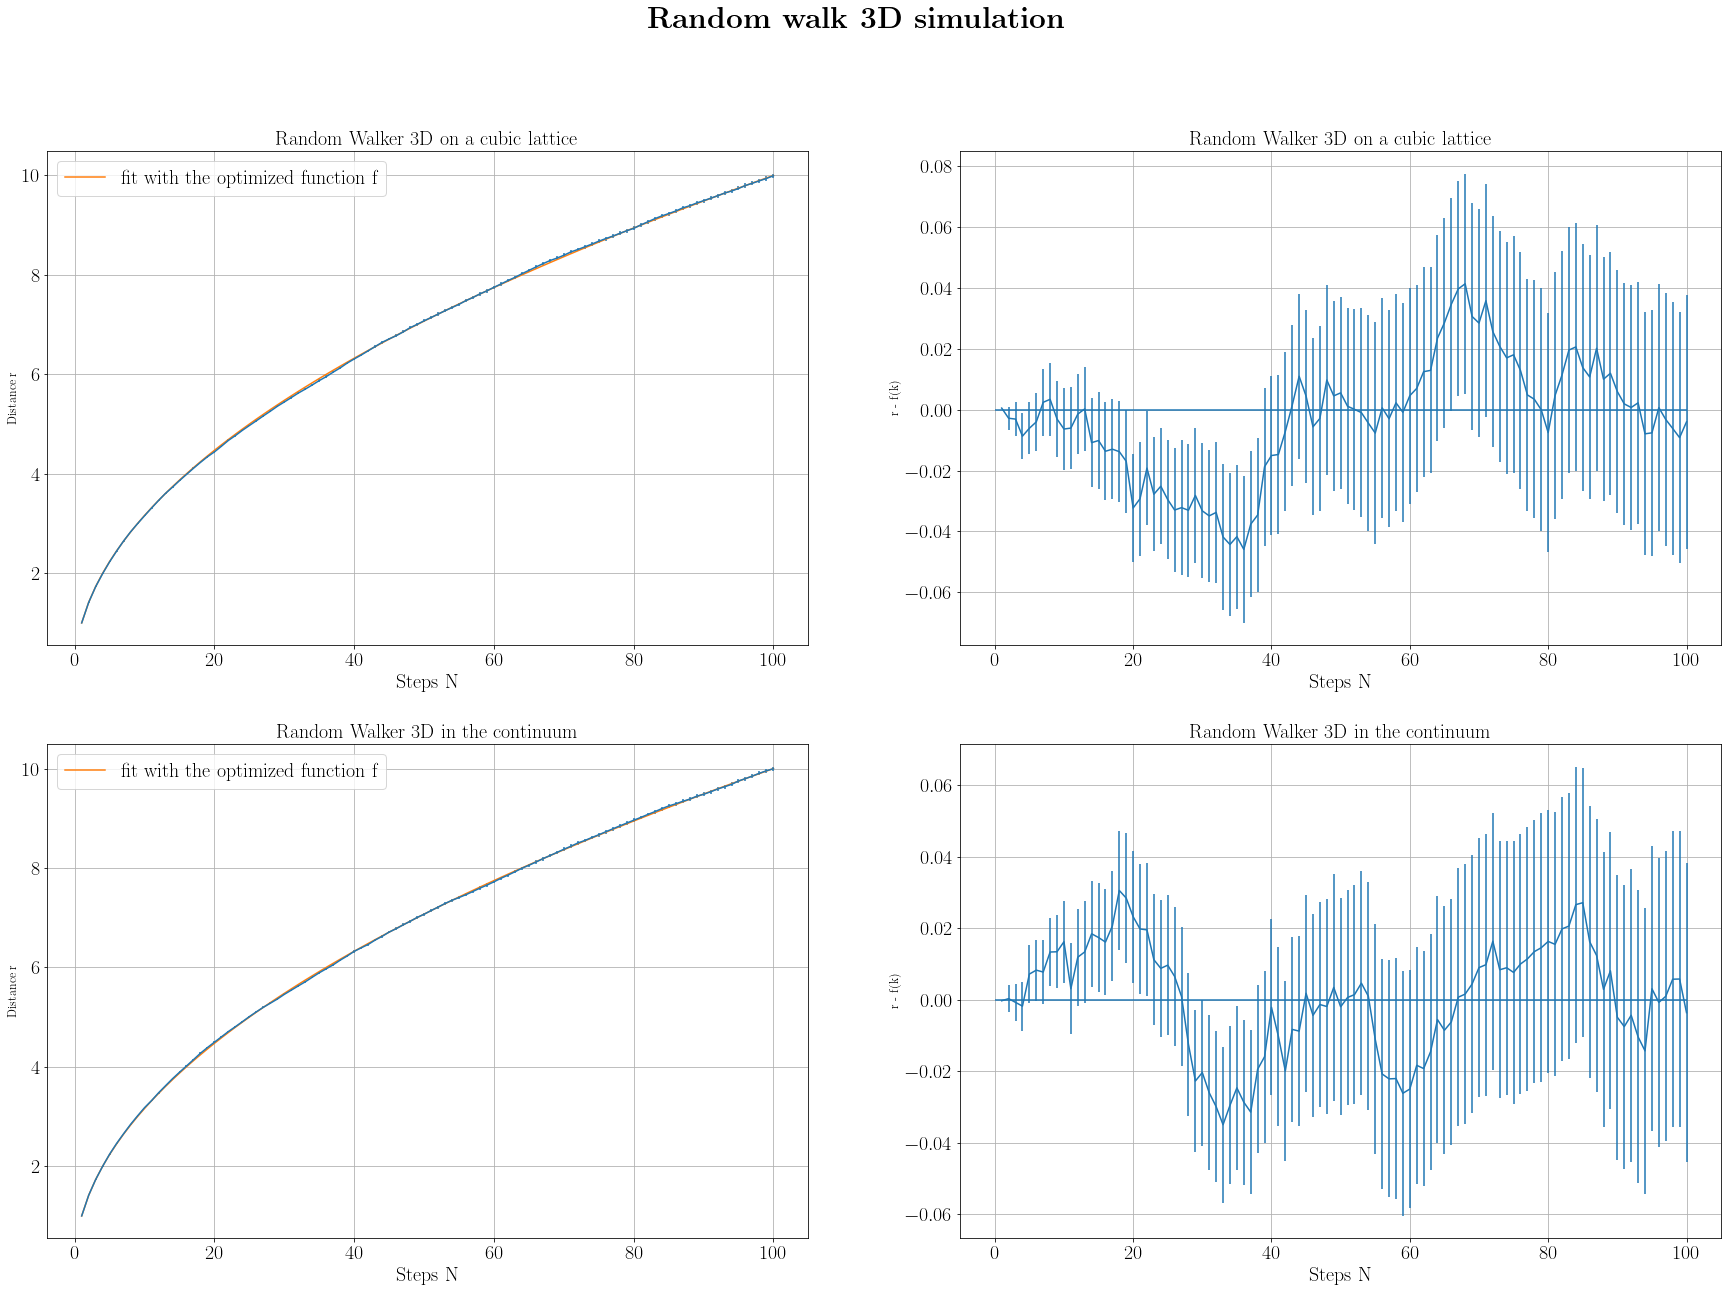

In [21]:
from scipy.optimize import curve_fit


def f(x,k):
    return k*x**(1/2)

Steps = np.arange(100) + 1;

distance_dis  = np.loadtxt(path+"discreteRW.txt", unpack=True)
error_distance_dis = np.loadtxt(path+"dev_discreteRW.txt", unpack=True)

distance_con = np.loadtxt(path+"continuosRW.txt", unpack=True)
error_distance_con = np.loadtxt(path+"dev_continuosRW.txt", unpack=True)

fig=plt.figure(figsize=(60,30))
plt.subplots(figsize=(30, 20))
plt.rcParams.update({'font.size': 20})
plt.suptitle(r"\textbf{Random walk 3D simulation}", fontsize='30', weight='bold')

plt.subplot(221)
plt.errorbar(Steps, distance_dis, yerr=error_distance_dis)
plt.xlabel('Steps N', size='20')
plt.ylabel('Distance r', size='12')
plt.title("Random Walker 3D on a cubic lattice", fontsize='20')
p_opt_dis, p_cov_dis = curve_fit(f, Steps, distance_dis, bounds=(0, 2))
y_fit_dis = f(Steps,p_opt_dis[0])
plt.plot(Steps,y_fit_dis, label = 'fit with the optimized function f')
plt.grid(True)
plt.legend()

print("optimized parameter k for the cubic lattice =")
print(str(p_opt_dis) + "+/-"  + str(p_cov_dis[0]))

plt.subplot(222)
plt.errorbar(Steps, distance_dis-y_fit_dis, yerr=error_distance_dis)
plt.xlabel('Steps N', size='20')
plt.ylabel('r - f(k) ', size='12')
plt.title("Random Walker 3D on a cubic lattice", fontsize='20')
plt.hlines(0, 0, Steps.size)
plt.grid(True)

         
plt.subplot(223)
plt.errorbar(Steps, distance_con, yerr=error_distance_con)
plt.xlabel('Steps N', size='20')
plt.ylabel('Distance r', size='12')
plt.title("Random Walker 3D in the continuum", fontsize='20')
p_opt_con, p_cov_con = curve_fit(f, Steps, distance_con, bounds=(0, 2))
y_fit_con = f(Steps,p_opt_con[0])
plt.plot(Steps,y_fit_con, label = 'fit with the optimized function f')
plt.grid(True)
plt.legend()

print("optimized parameter k for the continuum =")
print(str(p_opt_con) + "+/-"  + str(p_cov_con[0]))

plt.subplot(224)
plt.errorbar(Steps, distance_con - y_fit_con, yerr=error_distance_con)
plt.xlabel('Steps N', size='20')
plt.ylabel('r - f(k)', size='12')
plt.title("Random Walker 3D in the continuum", fontsize='20')
plt.hlines(0, 0, Steps.size)
plt.grid(True)

plt.show()

